In [47]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

# Table of Contents
>## 1. Performance of Clustering
* 1.1. When we have the Answers
* 1.2. When we don’t have the Answers

>## 2. K-Means Clustering
* 2.1. Algorithm
* 2.2. K-Means Clustering - `Scikit-Learn`
* 2.3. Example - `init=‘random’`
* 2.4. Example - `init=‘k-means++’`

>## 3. Affinity Propagation
* 3.1. Algorithm
* 3.2. Affinity Propagation - `Scikit-Learn`

>## 4. Hierarchical Clustering
* 4.1. Algorithm
* 4.2. Similarity Metric
* 4.3. Hierarchical Clustering - `SciPy`

>## 5. Gaussian Mixture & EM
* 5.1. Gaussian Mixture
* 5.2. Latent Variable Model
* 5.3. EM(Expectation-Maximization)
* 5.4. Gaussian Mixture - `Scikit-Learn`

# 1. Performance of Clustering

## 1.1. When we have the Answers

$$
\begin{array}{c|cccc|c}
{{} \atop X}\!\diagdown\!^Y &
Y_1&
Y_2&
\ldots&
Y_s&
\text{Sums}
\\
\hline
X_1&
n_{11}&
n_{12}&
\ldots&
n_{1s}&
a_1
\\
X_2&
n_{21}&
n_{22}&
\ldots&
n_{2s}&
a_2
\\
\vdots&
\vdots&
\vdots&
\ddots&
\vdots&
\vdots
\\
X_r&
n_{r1}&
n_{r2}&
\ldots&
n_{rs}&
a_r
\\
\hline
\text{Sums}&
b_1&
b_2&
\ldots&
b_s&
\end{array}
$$


### Adjusted Rand index

>$$
\overbrace{ARI}^\text{Adjusted Index} = \frac{ \overbrace{\sum_{ij} \binom{n_{ij}}{2}}^\text{Index} - \overbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}^\text{Expected Index} }{ \underbrace{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}]}_\text{Max Index} - \underbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}_\text{Expected Index} }
$$
>
>* $n_{ij}$: no. of elements $\in X_i$ and $\in Y_j$
>* $a_i = \sum_{j=1}^s n_{ij}$
>* $b_j = \sum_{i=1}^r n_{ij}$

### Adjusted Mutual Information

>$$ X=\{X_1, X_2,\ldots, X_r\} $$
>
>$$ Y=\{V_1, V_2,\ldots, V_s\} $$
>
>$$ P(i)=\frac{|X_i|}{N} $$
>
>$$ P(i,j)=\frac{|X_i \cap Y_j|}{N} $$
>
>$$ MI(X,Y)=\sum_{i=1}^r \sum_{j=1}^s P(i,j)\log \frac{P(i,j)}{P(i)P'(j)} $$

### Homogeneity, Completeness, V-measure
* **Homogeneity**: how much the same-cluster samples are of same class
* **Completeness**: how much the same-class samples are in same cluster
* **V-measure**: Harmonic mean of homogeneity & completeness

>$$ h = 1 - \frac{H[C|K]}{H[C]} $$
>
>$$ c = 1 - \frac{H[K|C]}{H[K]} $$
>
>$$ v = 2 \cdot \frac{h \cdot c}{h + c} $$
>
>* $H[C]$: Class entropy
>* $H[C|K]$: Class entropy after clustering
>* $H[K]$: Cluster entropy
>* $H[K|C]$: Cluster entropy after classification

## 1.2. When we don't have the Answers

### Silhouette Coefficient

>$$ s = \dfrac{b(i) - a(i)}{\max{(a(i), b(i))}} $$
>
>* $a(i)$: avg. distance between $i$ and all other data within the same cluster
>* $b(i)$: avg. distance between $i$ and all other data within the closest cluster, of which $i$ is not a member

### Silhouetter Coefficient - `Scikit-Learn`
* [reference](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


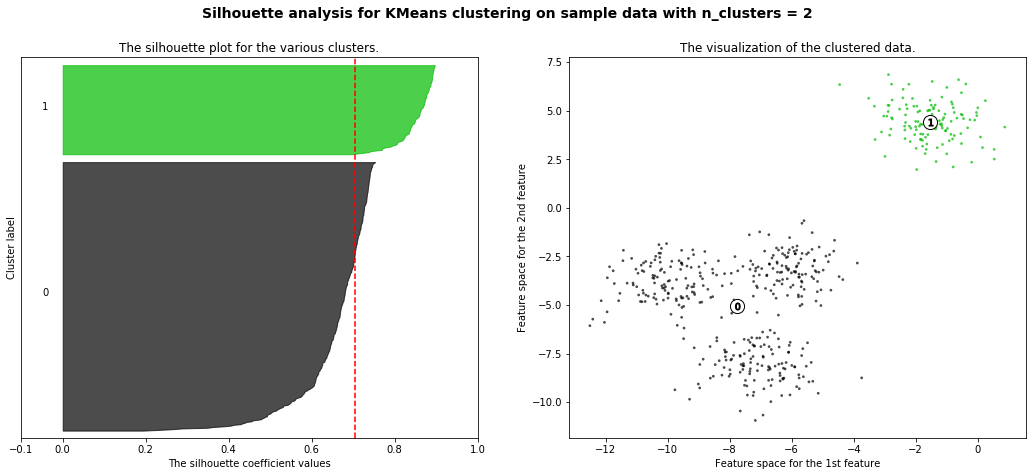

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


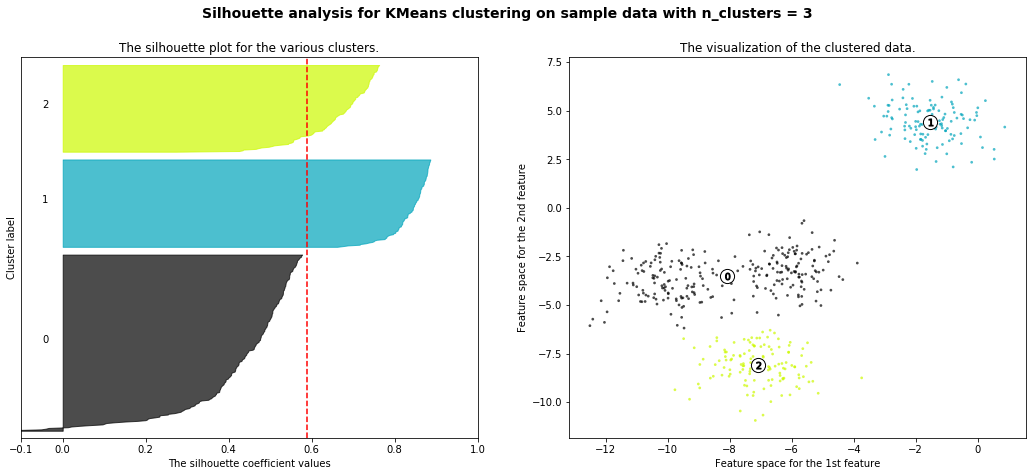

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


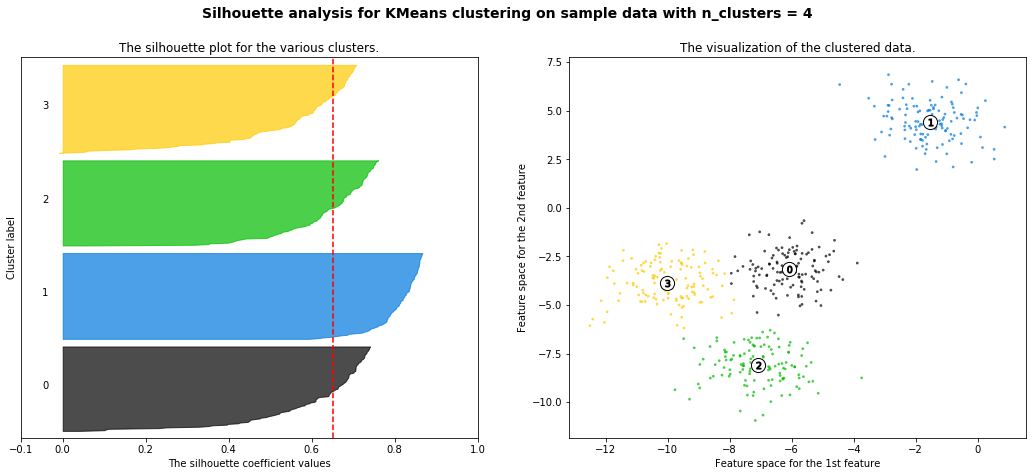

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


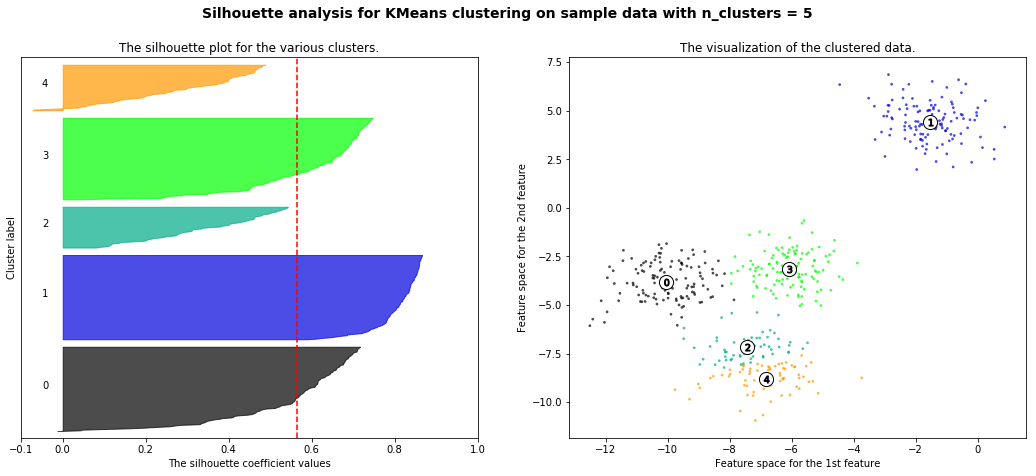

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


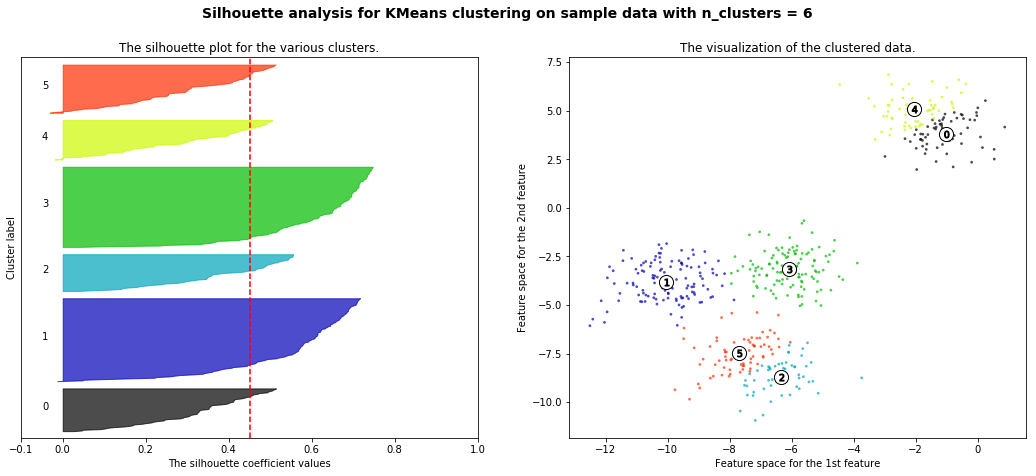

In [46]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# 2. K-Means Clustering
* Simplest & Fastest

## 2.1. Algorithm
#### Objective Function

>$$ J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)  $$
>
>* $d$: dissimilarity (or distance)
>
>$$ d(x_i, \mu_k) = || x_i - \mu_k ||^2 $$

#### Algorithm

>1. Select centroids $\mu_k$ (it is common to select from the samples)
>2. Calculate $|| x_i - \mu_k ||^2$
>3. For each sample, determine which of the $\mu_k$ is the closest & Update cluster
>4. Repeat

#### K-Means++
* Algorithm to select initial centroids

>1. Prepare a set $M$ that will store centroids
>2. Randomly select $\mu_0$, and put it in $M$
>3. For $x_i \notin M$, calculate $d(M, x_i)$ ($\mu_k$ that minimizes $d(\mu_k, x_i)$ is the class of $x_i$)
>4. Select the next $\mu$, based on pmf proportional to $d(M, x_i)$
>5. Repeat until $K$ centroids are selected
>6. Run K-Means algorithm

## 2.2. K-Means Clustering - `Scikit-Learn`
* `KMeans` class
* **Parameters**:
  * `n_clusters`
  * `init`: how to select initial centroids, `k-means++`, `'random'`, or `ndarray`
  * `n_init`: no. of trials (the model selects the best one from the `n_init` trials)
  * `max_iter`: iteration for each trial
  * `random_state`

## 2.3. Example - `init='random'`

#### Prepare Data

In [51]:
from sklearn.cluster import KMeans

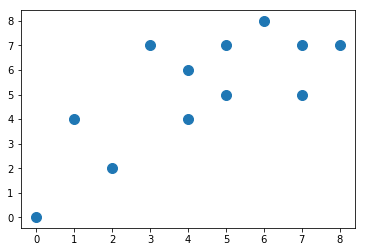

In [52]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

#### Visualization of the Clusters

In [53]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

#### Prints the Distance & Class

In [54]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                 np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
                                 np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
                                 model.labels_[:, np.newaxis]]),
                      columns=["x0", "x1", "d0", "d1", "c"])
    return df

#### Calculates new Centroid

In [55]:
def calc_new_centroid(model):
    c0_new = (X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean())
    c1_new = (X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean())
    return c0_new, c1_new

#### `max_iter=1`

score:  -63.00408163265301


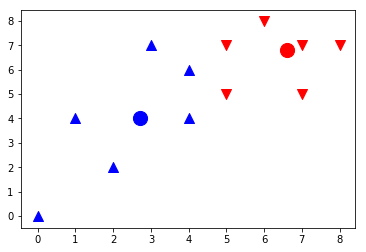

In [95]:
model1 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

c0, c1 = model1.cluster_centers_

print("score: ", model1.score(X))

plot_cluster(model1, c0, c1)

#### `max_iter=2`

score:  -59.22222222222216


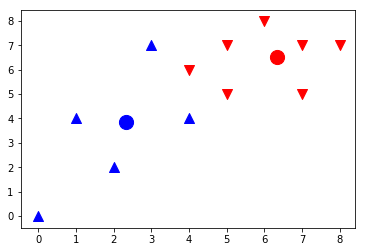

In [98]:
model2 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=2, random_state=1).fit(X)

c0, c1 = model2.cluster_centers_

print("score: ", model2.score(X))

plot_cluster(model2, c0, c1)

#### `max_iter=3`

score:  -52.2808163265307


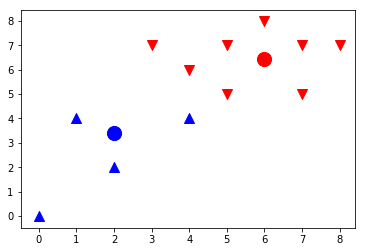

In [101]:
model3 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=3, random_state=1).fit(X)

c0, c1 = model3.cluster_centers_

print("score: ", model3.score(X))

plot_cluster(model3, c0, c1)

#### `max_iter=4`

score:  -47.625


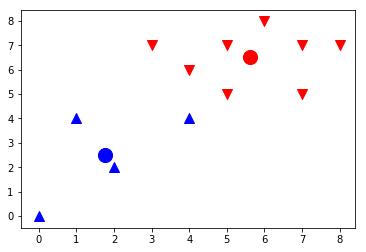

In [104]:
model4 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=4, random_state=1).fit(X)

c0, c1 = model4.cluster_centers_

print("score: ", model4.score(X))

plot_cluster(model4, c0, c1)

#### `max_iter=5`

score:  -47.625


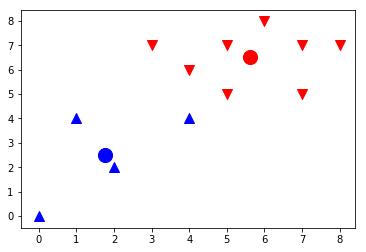

In [107]:
model5 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=5, random_state=1).fit(X)

c0, c1 = model5.cluster_centers_

print("score: ", model5.score(X))

plot_cluster(model5, c0, c1)

In [108]:
kmeans_df(model5, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,2.034853,5.814852,0.0
1,5.0,7.0,0.800391,5.550901,0.0
2,7.0,7.0,1.463087,6.914658,0.0
3,4.0,4.0,2.981715,2.704163,1.0
4,4.0,6.0,1.700184,4.160829,0.0
5,1.0,4.0,5.257435,1.677051,1.0
6,0.0,0.0,8.595966,3.051639,1.0
7,2.0,2.0,5.778462,0.559017,1.0
8,8.0,7.0,2.427061,7.701461,0.0
9,6.0,8.0,1.546165,6.950719,0.0


In [109]:
calc_new_centroid(model5)

((5.625, 6.5), (1.75, 2.5))

## 2.4. Example - `init='k-means++'`

### Iris Dataset

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target


def plot_iris_cluster(model):
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(
        np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

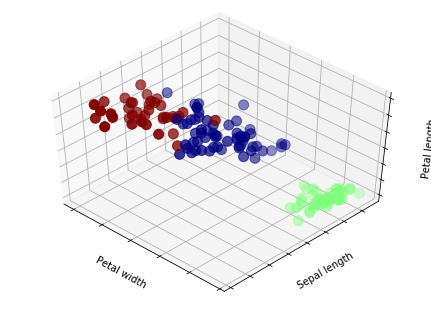

In [38]:
model3 = KMeans(n_clusters=3)
plot_iris_cluster(model3)

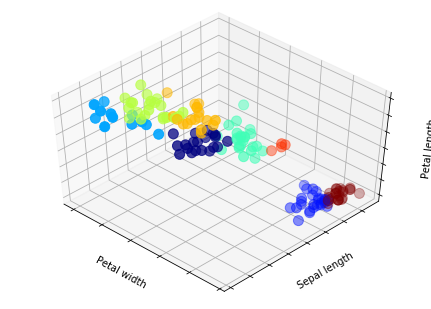

In [39]:
model8 = KMeans(n_clusters=8)
plot_iris_cluster(model8)

### Digits Dataset

In [40]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

def show_digits(images, labels):
    f = plt.figure(figsize=(10,2))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

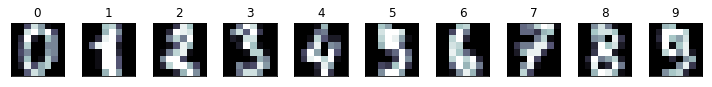

In [41]:
show_digits(digits.images, range(10))

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = \
    train_test_split(data, digits.target, digits.images,
                     test_size=0.25, random_state=42)

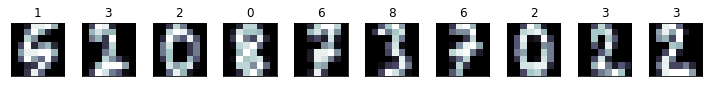

In [43]:
model = KMeans(init="k-means++", n_clusters=10, random_state=42)
model.fit(X_train)
show_digits(images_train, model.labels_)

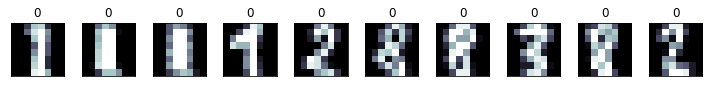

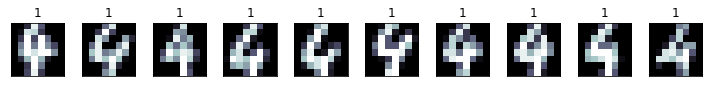

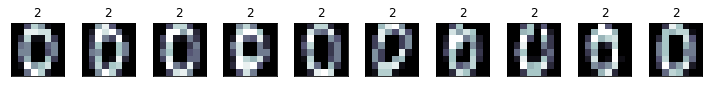

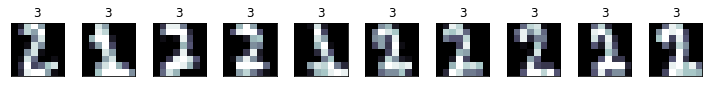

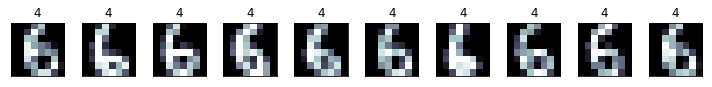

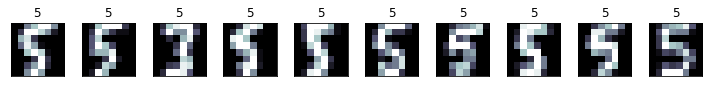

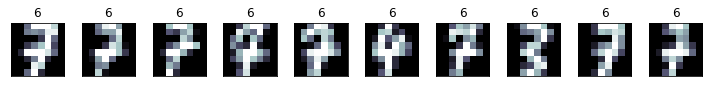

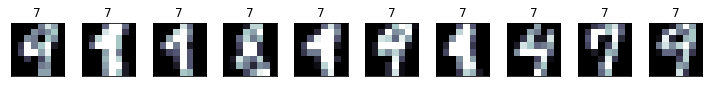

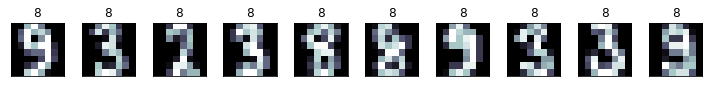

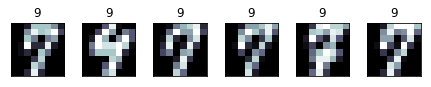

In [44]:
y_pred = model.predict(X_test)

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

for i in range(10):
    show_cluster(images_test, y_pred, i)

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])

# 3. Affinity Propagation

## 3.1. Algorithm
#### Responsibility, $r(i, k)$

* How "well-suited" $x_k$ is to serve as the exemplar for $x_i$, relative to other candidate exemplars for $x_i$

#### Availability $a(i, k)$

* How "appropriate" it would be for $x_i$ to pick $x_k$ as its exemplar, taking into account other points' preference for $x_k$ as an exemplar.

#### Self-Representation

* If $x_i$ is represented by $x_i$ $\rightarrow$ $x_i$ becomes the centroid

#### Algorithm: repeat until $r$ and $a$ converge
>$$ r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} ( a(i, k') + s(i, k')) $$
>$$ a(i, k) \leftarrow \min(0, r(k, k) + \sum_{i' \neq i,k} r(i', k)) $$
>
>* $s(i,k) = -|| x_i - x_k ||^2$
>* $s(k,k)$: hyperparameter, some negative value, decides the no. of clusters
>* If $s(k,k)$ is huge, self-similarity $\uparrow$ $\rightarrow$ no. of clusters $\uparrow$
>* Centroids: the samples that satisfy $r(k,k) + a(k,k) > 0$ at the end

## 3.2. Affinity Propagation - `Scikit-Learn`
* `AffinityPropagaion` class
* [reference](http://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html)

In [110]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [111]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(X)

In [112]:
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

from sklearn import metrics

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


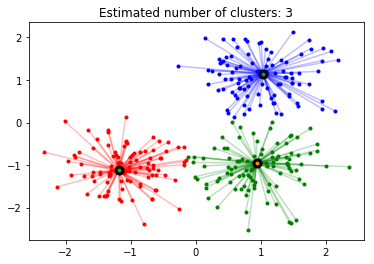

In [113]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 4. Hierarchical Clustering

## 4.1. Algorithm
#### Agglomerative (bottom up)
>1. Each observation starts in its own cluster
>2. Pairs of clusters are merged as one moves up the hierarchy

#### Divisive (top down)
>1. All observations start in one cluster
>2. Splits are performed recursively as one moves down the hierarchy

## 4.2. Similarity Metric
* Different ways to calculate the distance between clusters $u$ and $v$

### Non-Inductive Metric

#### Centroid (distance between the centroids)

>$$ d(u,v) = \|c_u - c_v\|_2 $$

#### Single (a.k.a. Nearest Point)

>$$ d(u,v) = \min(dist(u[i],v[j])) $$

#### Complete (a.k.a. Farthest Point or Voor Hees Algorithm)

>$$ d(u, v) = \max(dist(u[i],v[j])) $$

#### Average

>$$ d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}{|u||v|} $$



### Inductive Metric
* Agglomerative clustering only
* If $u$ is made by merging $s$ and $t$:

#### Median

>$$ c_u=\frac{c_s+c_t}{2} $$
>
>$$ d(u,v) = \|c_u - c_v\|_2 $$

#### Weighted

>$$ d(u,v) = (dist(s,v) + dist(t,v))/2 $$

#### Ward

>$$
   d(u,v) = \sqrt{\frac{|v|+|s|}{|v|+|s|+|t|}d(v,s)^2 + \frac{|v|+|t|}{|v|+|s|+|t|}d(v,t)^2 - \frac{|v|}{|v|+|s|+|t|}d(s,t)^2}
$$

## 4.3. Hierarchical Clustering - `SciPy`

* `scipy.cluster.hierarchy.linkage`: **Agglomerative Clustering**
* `scipy.cluster.hierarchy.dendrogram`: **Tree-like Visualization of Clustering**
* [reference](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering)

(150, 2)


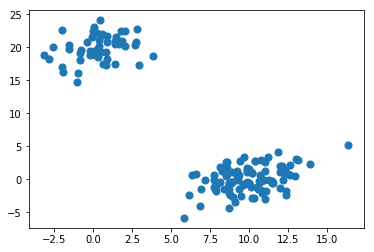

In [119]:
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(precision=5, suppress=True) 

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [120]:
Z = linkage(X, 'ward')

In [121]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

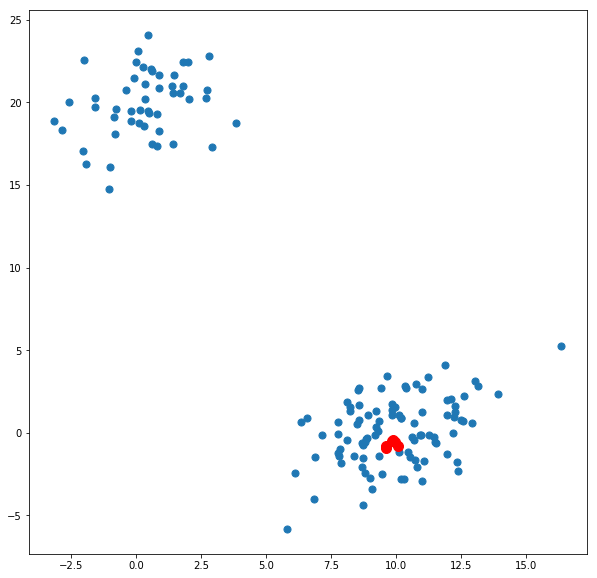

In [122]:
idxs = [33, 68, 62, 82, 63, 98]
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=50)
plt.scatter(X[idxs,0], X[idxs,1], c='r', s=100) 
plt.show()

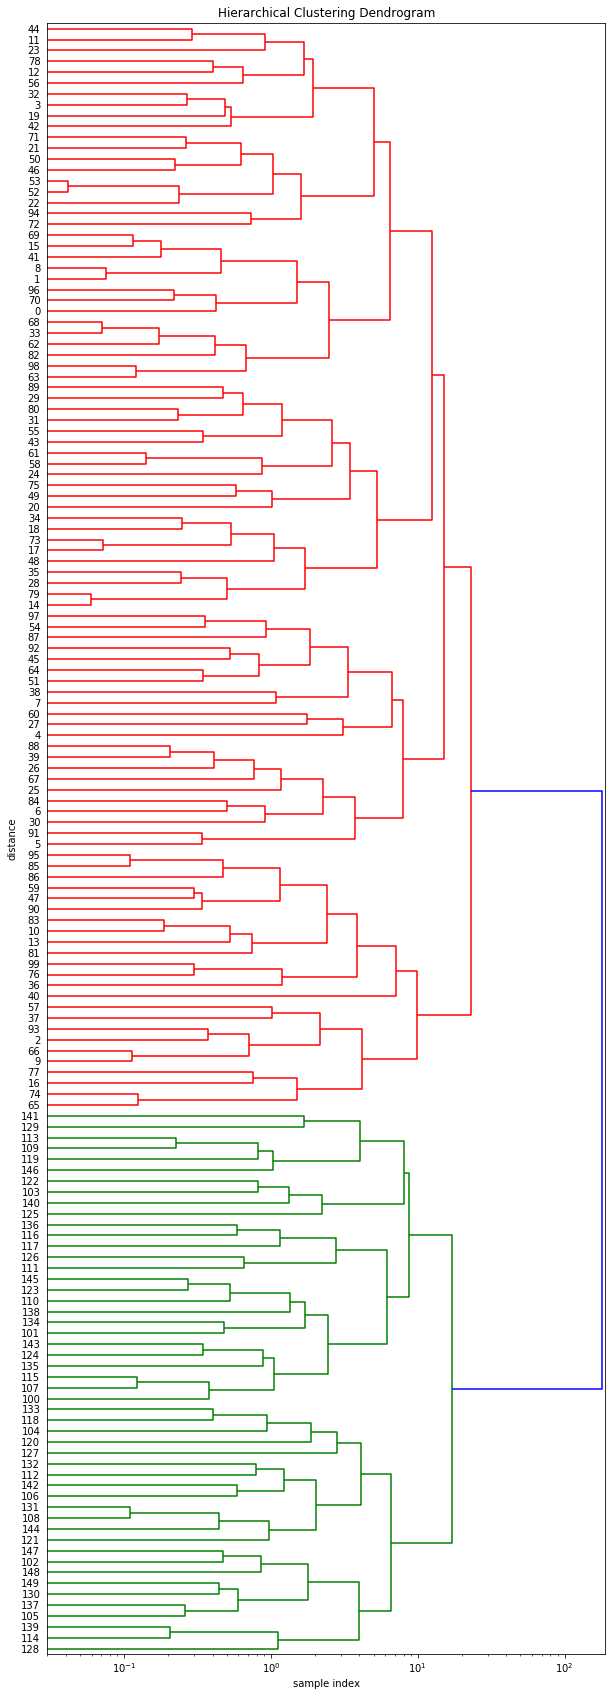

In [123]:
mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(Z, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax.set_xlim(xmin=0.03)
ax.set_xscale('log')
plt.show()

# 5. Gaussian Mixture & EM

In [124]:
import warnings
warnings.simplefilter("ignore")

## 5.1. Gaussian Mixture

* $X$ $\leftarrow$ Mixture of $K$ Gaussian Normal distributions

>$$ p(x) = \sum_Z p(z)p(x|z) = \sum_{k=1}^{K} \theta_k \mathcal{N}(x|\mu_k, \Sigma_k) $$

* $p(x)$
* $p(x|z)$: Gaussian Normal
* $p(z)$ : Categorical distribution
* $\theta_k$: Probability of each category being selected
* $\sum\theta_k = 1$

### Bernoulli Gaussia Mixture
* Gaussian Mixture with 2 Category

<img src="https://datascienceschool.net/upfiles/16f53a04ffdf42febe4a175c1138b701.png" style="width: 80%">

### Bernoulli Gausian Mixture - Example

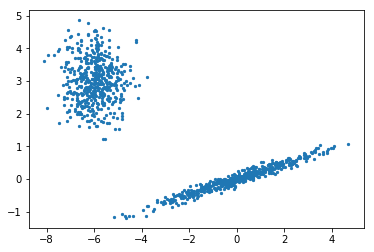

In [125]:
from numpy.random import randn

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2,
         ]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

## 5.2. Latent Variable Model 
* **Difficult to estimate parameters**

#### Likelihood

>$$ L= \prod_{i=1}^N p(x_i) = \prod_{i=1}^N \sum_{z_i} p(z_i)p(x_i|z_i)  = \prod_{i=1}^N \sum_{k=1}^{K} \theta_k \mathcal{N}(x_i|\mu_k, \Sigma_k)$$
>
>$$  LL = \sum_{i=1}^N \log \left( \sum_{k=1}^{K} \theta_k \mathcal{N}(x_i|\mu_k, \Sigma_k) \right) $$
>
>$$ \rightarrow \text{difficult to optimize} $$

#### If we know the category, 

>$$p(X=x_i|Z=z_i) = \mathcal{N}(x_i |\mu_{z_i}, \Sigma_{z_i})$$
>
>$$\rightarrow \text{simple optimization}$$

#### Latent Variable Model

>$$\text{models with latent variable (categorical or real)}$$

## 5.3. EM(Expectation-Maximization)
* **Alternative method of parameter estimation**

#### Responsibility, $p(z|x)$

>$$ 
\begin{eqnarray}
\gamma_{ik} 
&=& p(z_i=k|x_i) \\
&=& \dfrac{p(z_i=k)p(x_i|z_i=k)}{p(x_i)} \\
&=& \dfrac{p(z_i=k)p(x_i|z_i=k)}{\sum_{k=1}^K p(x_i,z_i=k)} \\
&=& \dfrac{p(z_i=k)p(x_i|z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i|z_i=k)} 
\end{eqnarray}
$$

#### Responsibility of Gaussian Mixture

>$$ \gamma_{ik} = \dfrac{\theta_k \mathcal{N}(x_i|\mu_k, \Sigma_k)}{\sum_{k=1}^K \theta_k \mathcal{N}(x_i|\mu_k, \Sigma_k)} $$
>
>$$ (\theta_k, \mu_k, \Sigma_k) \;\; \implies \;\; \gamma_{ik} $$

#### Differentiate $LL$ with $\mu_k$

>$$0 = - \sum_{i=1}^N \dfrac{p(z_i=k)p(x_i|z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i|z_i=k)} \Sigma_k (x_i - \mu_k ) $$
>
>$$ \sum_{i=1}^N \gamma_{ik} (x_i - \mu_k ) = 0$$
>
>$$ \mu_k = \dfrac{1}{N_k} \sum_{i=1}^N \gamma_{ik} x_i $$
>
>$$ \text{where} \;\; N_k = \sum_{i=1}^N \gamma_{ik} $$

#### Differentiate $LL$ with $\Sigma_k$

>$$ \Sigma_k = \dfrac{1}{N_k} \sum_{i=1}^N \gamma_{ik} (x_i-\mu_k)(x_i-\mu_k)^T $$

#### Differentiate $LL$ with $\theta_k$

>$$ \text{Condition:} \;\; \sum_{k=1}^K \theta_k = 1$$
>
>$$ LL \rightarrow LL + \lambda \left(\sum_{k=1}^K \theta_k - 1 \right) $$
>
>$$ \theta_k = \dfrac{N_k}{N} $$

#### EM Method
* Iterative method of parameter (and responsibility) estimation

>1. **E Step** - estimate $\gamma_{ik}$, assuming that we have correct $(\theta_k, \mu_k, \Sigma_k)$
>
>2. **M Step** - estimate $(\theta_k, \mu_k, \Sigma_k)$, assuming that we have correct $\gamma_{ik}$
>
>3. **Repeat**

#### Use EM Method for Clustering

>$$ k_i = \arg\max_{k} \gamma_{ik} $$
>
>$$\text{K-means Clustering: special case of EM}$$

## 5.4. Gaussian Mixture - `Scikit-Learn`
* `GaussianMixture` class

In [126]:
from sklearn.mixture import GaussianMixture

In [127]:
model = GaussianMixture(n_components=2, init_params='random', random_state=0, max_iter=1)
model.fit(X)

GaussianMixture(covariance_type='full', init_params='random', max_iter=1,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [128]:
gamma = model.predict_proba(X)

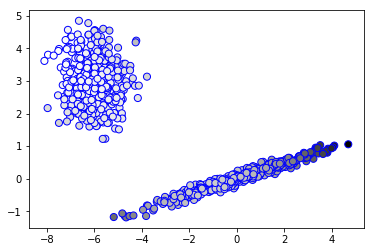

In [129]:
plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
plt.show()

In [130]:
def plot_gaussianmixture(n, k=10):
    model = GaussianMixture(n_components=2, init_params='random', random_state=1, tol=1e-9, max_iter=n)
    model.fit(X)
    gamma = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
    plt.show()
    return model

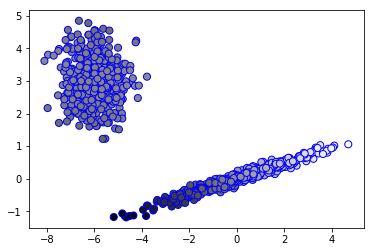

In [131]:
plot_gaussianmixture(5);

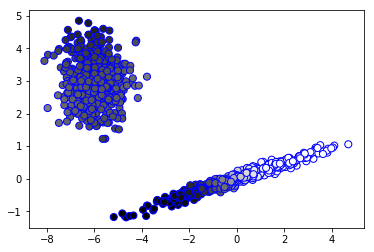

In [132]:
plot_gaussianmixture(10);

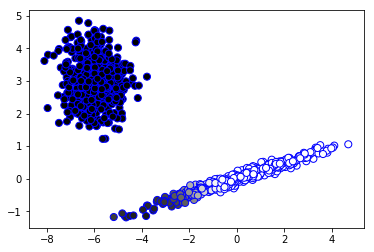

In [133]:
plot_gaussianmixture(15);

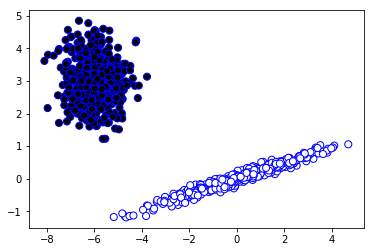

In [134]:
plot_gaussianmixture(20);